## Install packages and dependencies

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Crab Dataset

We begin with a dataset on crab attributes physical attributes. This dataset has 9 columns: sex, length, diameter, height, weight, shucked weight, viscera weight, shell weight, and age. Most of the columns are self explantory; viscera weight means the weight of the crab without the shell. This dataset presents excellent opportunities for classification on sex and regression on age.

## Exploratory Data Analysis

In [46]:
# Load the dataset
if(IN_COLAB):
  from google.colab import drive
  drive.mount('/content/drive')
  crab_data = pd.read_csv('/content/drive/MyDrive/gatech/CrabAgePrediction.csv')
else:
  crab_data = pd.read_csv('CrabAgePrediction.csv')
#Peeking the data
crab_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [47]:
# Counting the occurrences of each type in the "Sex" column
sex_counts = crab_data['Sex'].value_counts()
sex_counts

#M = male, F = female, I = indeterminate

# The dataset is balanced for the sex characteristic. Sex is an excellent candidate for classification.


M    1435
I    1233
F    1225
Name: Sex, dtype: int64

In [48]:
# I would prefer to do binary classification, so i'll remove all the indeterminate rows from the data
# Remove rows where the "Sex" column is "I"
crab_data = crab_data[crab_data['Sex'] != 'I']

sex_counts = crab_data['Sex'].value_counts()
sex_counts

# Sex data is still balanced

M    1435
F    1225
Name: Sex, dtype: int64

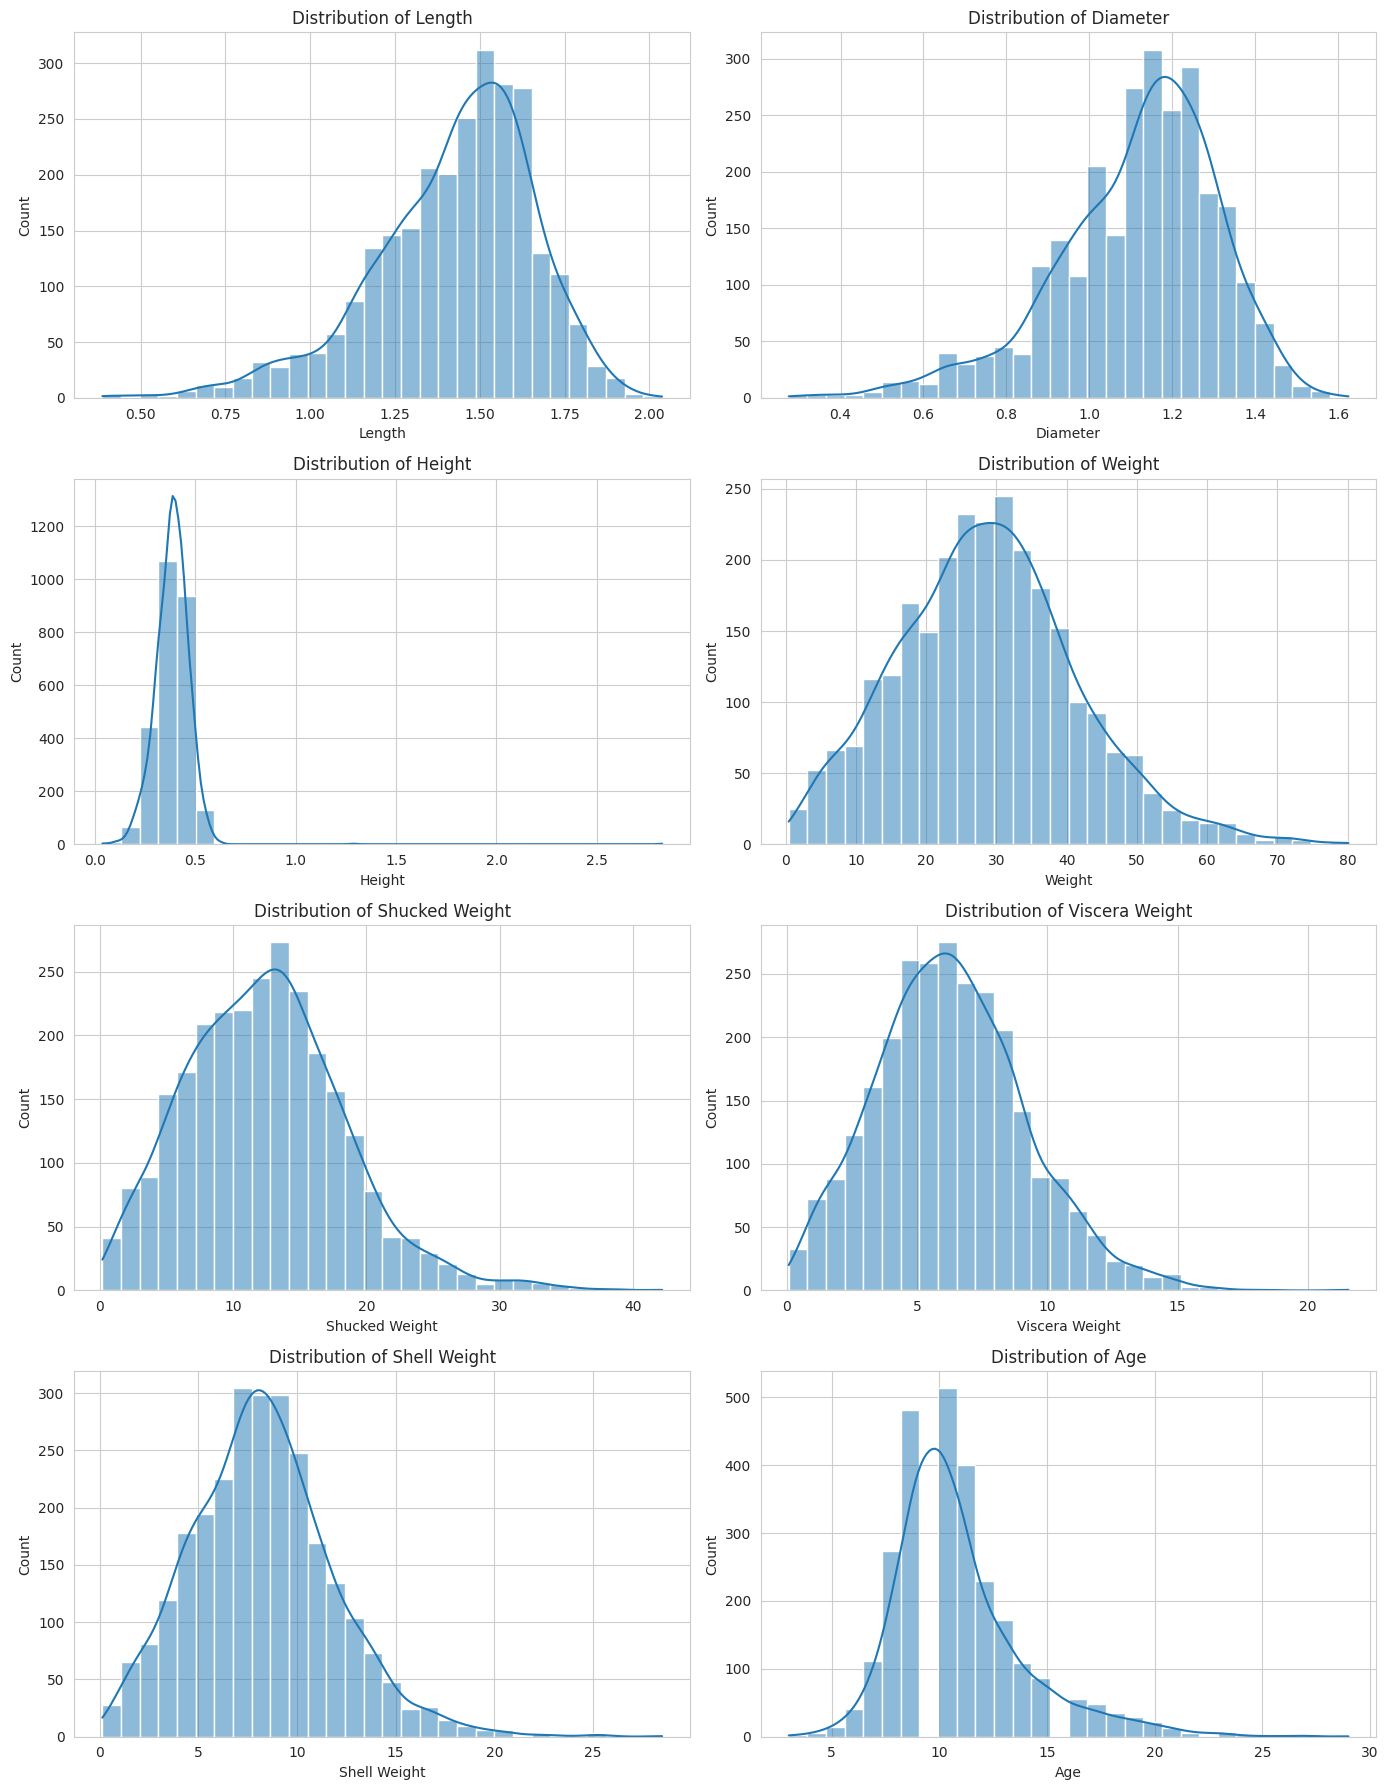

In [49]:
# Visualize distribution of numerical data

# Setting the visual style of our plots
sns.set_style('whitegrid')

# Update the list of float columns with capitalized names
float_columns = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']

# Define the figure and axes for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))

# Flatten the 2D array of axes for easy iteration
axes = axes.ravel()

# Loop through each float column and plot its distribution
for i, col in enumerate(float_columns):
    sns.histplot(crab_data[col], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout for better appearance
plt.tight_layout()
#plt.show()


In [50]:
# Looking for missing data

missing_data = crab_data.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


There is no missing data.

In [51]:
# Check for outliers
def percentage_outliers(data):
    """
    Calculate the percentage of outliers in a pandas Series using the IQR method.

    Parameters:
        data (pd.Series): The data series to check for outliers.

    Returns:
        float: The percentage of outliers in the data.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((data < lower_bound) | (data > upper_bound)).sum()

    # Calculating the percentage
    return (outlier_count / len(data)) * 100

# Applying the function to each numeric column in the dataset
outlier_percentages = crab_data.select_dtypes(include=['float64']).apply(percentage_outliers)

# Displaying the table
outlier_percentages


Length            2.406015
Diameter          2.030075
Height            1.917293
Weight            1.278195
Shucked Weight    1.503759
Viscera Weight    1.052632
Shell Weight      1.616541
dtype: float64

The percentage of outliers is really low, less than 2%, in each column. The data is fine.

# Sports car data
## Conversion into classification problem
Cars in general can be quite expensive. Sports cars pour a lot into performance. The lower end cars divert so much into performance that some of are just engines that happens to have seats in them. Around 100 or 150k is where you start to see manufacturers add in nice amenties to their cars and it becomes a luxury sports car.

In [128]:
# Load the dataset
if(IN_COLAB):
  from google.colab import drive
  drive.mount('/content/drive')
  sportsCar_data = pd.read_csv('/content/drive/MyDrive/gatech/SportsCarPrice.csv')
else:
  sportsCar_data = pd.read_csv('SportsCarPrice.csv')
#Peeking the data
sportsCar_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [100]:
# Classify values using numpy
sportsCar_data['price class'] = np.where(sportsCar_data['Price (in USD)'] >= 150000, 'above_150k', 'below_150k')
sportsCar_data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),price class
0,Porsche,911,2022,3,379,331,4,101200,below_150k
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390,above_150k
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750,above_150k
3,Audi,R8,2022,5.2,562,406,3.2,142700,below_150k
4,McLaren,720S,2021,4,710,568,2.7,298000,above_150k


In [101]:
count = sportsCar_data['price class'].value_counts()
print(count)
# The data is balanced.

below_150k    532
above_150k    475
Name: price class, dtype: int64


In [102]:
print(sportsCar_data.head())

      Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0      Porsche       911  2022               3        379            331   
1  Lamborghini   Huracan  2021             5.2        630            443   
2      Ferrari   488 GTB  2022             3.9        661            561   
3         Audi        R8  2022             5.2        562            406   
4      McLaren      720S  2021               4        710            568   

  0-60 MPH Time (seconds)  Price (in USD) price class  
0                       4          101200  below_150k  
1                     2.8          274390  above_150k  
2                       3          333750  above_150k  
3                     3.2          142700  below_150k  
4                     2.7          298000  above_150k  


In [104]:
from sklearn.model_selection import train_test_split

# Data retrieval and splitting

# Crab data
Xcrab = crab_data.drop('Sex', axis=1)
ycrab = crab_data['Sex']
# Split the data with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(Xcrab, ycrab, test_size=0.2, random_state=42)

# Sports car data
sportsCar_data = sportsCar_data.drop(columns=['Price (in USD)', 'Car Model'])
sportsCar_data['Year'] = sportsCar_data['Year'].apply(lambda x: 1 if x == 2022 else (0 if x == 2021 else x)) #one-hot encode year
Xsportscar = sportsCar_data.drop(columns=['price class'])
ysportscar = sportsCar_data['price class']
# Split the data with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(Xsportscar, ysportscar, test_size=0.2, random_state=42)

# Common helper functions

In [56]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import timeit
from sklearn.model_selection import train_test_split

def plot_learning_curve(classifier, X, y, cv=5, n_jobs=-1,
                        train_sizes=np.linspace(0.1, 1.0, 10),
                        scoring='accuracy', title = 'Learning Curve'):
  """
  Plot learning curve for a given classifier and data.

  Parameters:
  - classifier: the ML model/estimator
  - X: Feature matrix
  - y: Target vector
  - cv: Number of cross-validation folds (default is 5)
  - n_jobs: Number of CPU cores to use (default is -1, meaning use all cores)
  - train_sizes: Relative or absolute numbers of training examples that will be used to generate the learning curve
  - scoring: Evaluation metric (default is 'accuracy')

  Returns:
  - Plots the learning curve
  """
  train_sizes, train_scores, test_scores = learning_curve(
      classifier,
      X,
      y,
      cv=cv,
      n_jobs=n_jobs,
      train_sizes=train_sizes,
      scoring=scoring
  )

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  plt.figure(figsize=(10, 6))
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Test accuracy')
  plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.grid()
  plt.xlabel('Number of training samples')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.title(title)
  plt.show()

  # Example usage:
  # from sklearn.tree import DecisionTreeClassifier
  # plot_learning_curve(DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf=56, criterion="entropy"), X, y)

def plot_times_curve(classifier, X, y, train_sizes=np.linspace(0.1, 1.0, 10), title="Training and Prediction Times vs. Number of Training Samples"):
    """
    Plot training and prediction times as the number of training samples increase.

    Parameters:
    - classifier: the ML model/estimator
    - X: Feature matrix
    - y: Target vector
    - train_sizes: Relative intervals for training size

    Returns:
    - Plots the curves of training and prediction times
    """

    train_times = []
    predict_times = []

    for size in train_sizes:
        subset_size = int(size * X.shape[0])

        if subset_size == X.shape[0]:
            X_subset = X
            y_subset = y
        else:
            X_subset, _, y_subset, _ = train_test_split(X, y, train_size=subset_size)

        # Training time
        start_time = timeit.default_timer()
        classifier.fit(X_subset, y_subset)
        end_time = timeit.default_timer()
        train_times.append(end_time - start_time)

        # Prediction time
        start_time = timeit.default_timer()
        classifier.predict(X_subset)
        end_time = timeit.default_timer()
        predict_times.append(end_time - start_time)

    # Plotting the times
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_times, '-o', label="Training Time", color='blue')
    plt.plot(train_sizes, predict_times, '-o', label="Prediction Time", color='green')
    plt.ylabel("Time (seconds)")
    plt.xlabel("Proportion of Training Data Used")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


# plot_learning_curve(classifier, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', title = 'Learning Curve')
# plot_times_curve(DecisionTreeClassifier(), X, y)




# KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


def knn_classifier(X_train, y_train, X_test, y_test, n_neighbors=5, metric='euclidean'):
    """
    Train and evaluate a K-Nearest Neighbors model.

    Parameters:
    - X_train, y_train: Training data and labels.
    - X_test, y_test: Test data and labels.
    - n_neighbors: Number of neighbors to use in the KNN algorithm.
    - metric: The distance metric to use. Default is 'euclidean'.

    Returns:
    - A dictionary containing:
        'model': the trained KNN model,
        'y_pred': predictions on the test data,
        'accuracy': accuracy on the test data,
        'classification_report': classification report for test data.
    """

    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

    # Fit the model
    knn.fit(X_train, y_train)

    # Predict on test data
    y_pred = knn.predict(X_test)

    # Compute accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return {
        'model': knn,
        'y_pred': y_pred,
        'accuracy': accuracy,
        'classification_report': report
    }

# Example usage:
# result = knn_classifier(X_train, y_train, X_test, y_test)
# print(result['accuracy'])
# print(result['classification_report'])

def knn_grid_search(X_train, y_train, n_values = list(range(1, 201, 5))):
    """
    Grid search to find the best value of n_neighbors using 5-fold CV.

    Parameters:
    - X_train, y_train: Training data and labels.
    - n_values: List of neighbor values to test.

    Returns:
    - Best value of n_neighbors.
    """

    # Initialize KNN classifier
    knn = KNeighborsClassifier()

    # Parameter grid
    param_grid = {'n_neighbors': n_values}

    # Grid search with 5-fold CV
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print (f"The best parameter for n is {grid_search.best_params_['n_neighbors']}")
    return grid_search.best_params_['n_neighbors']

def plot_knn_performance(X_train, y_train, X_test, y_test, n_values = list(range(1, 201, 5)), title='KNN Performance over Different Values of n_neighbors'):
    """
    Plot the training and test performance over different values of n_neighbors.

    Parameters:
    - X_train, y_train: Training data and labels.
    - X_test, y_test: Test data and labels.
    - n_values: List of neighbor values to test.
    """

    train_scores = []
    test_scores = []

    for n in n_values:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)

        train_score = knn.score(X_train, y_train)
        test_score = knn.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    # Plotting
    plt.plot(n_values, train_scores, '-o', label='Training Score')
    plt.plot(n_values, test_scores, '-o', label='Test Score')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()


The best parameter for n is 171


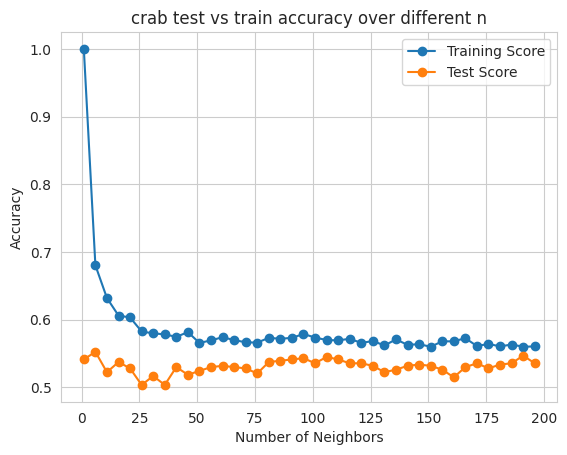

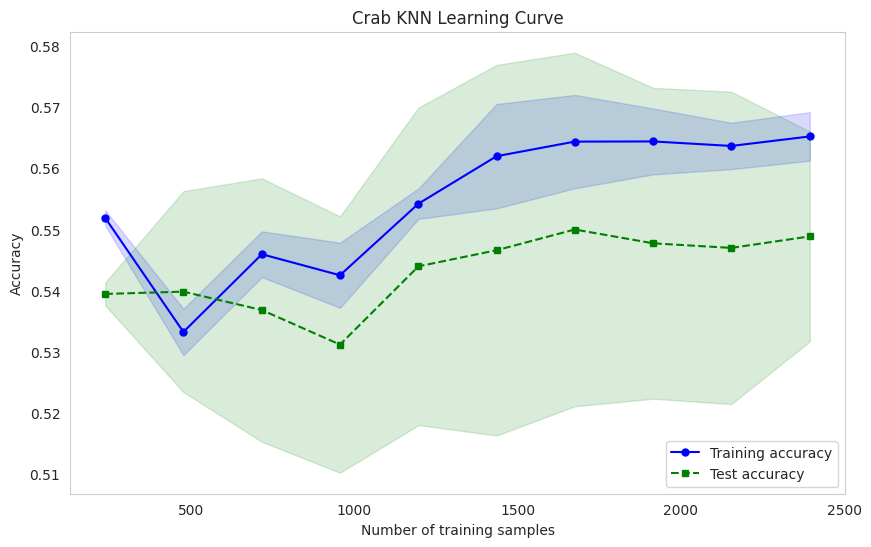

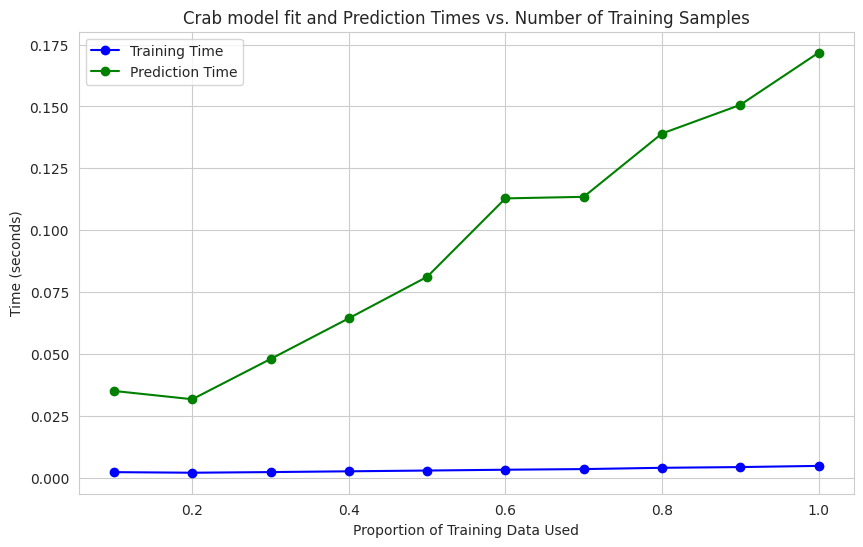

In [58]:
# Crab data knn grid search, best n plot, learning curve, modeling time
X_train, X_test, y_train, y_test = train_test_split(Xcrab, ycrab, test_size=0.2, random_state=42)

knn_grid_search(X_train, y_train)
plot_knn_performance(X_train, y_train, X_test, y_test, n_values = list(range(1, 201, 5)), title= 'crab test vs train accuracy over different n')

plot_learning_curve(KNeighborsClassifier(n_neighbors=171, metric='euclidean'), Xcrab, ycrab, cv=10, n_jobs=-1,
                        train_sizes=np.linspace(0.1, 1.0, 10),
                        scoring='accuracy', title = 'Crab KNN Learning Curve')

plot_times_curve(KNeighborsClassifier(n_neighbors=171, metric='euclidean'), Xcrab, ycrab, train_sizes=np.linspace(0.1, 1.0, 10), title="Crab model fit and Prediction Times vs. Number of Training Samples")

In [112]:
# Sports car data knn grid search, best n plot, learning curve, modeling time
# X_train, X_test, y_train, y_test = train_test_split(Xsportscar, ysportscar, test_size=0.2, random_state=42)
# knn_grid_search(X_train, y_train)
# plot_knn_performance(X_train, y_train, X_test, y_test, n_values = list(range(1, 201, 5)), title= 'Sports Car test vs train accuracy over different n')

# plot_learning_curve(KNeighborsClassifier(n_neighbors=171, metric='euclidean'), XsportsCar, ysportsCar, cv=10, n_jobs=-1,
#                         train_sizes=np.linspace(0.1, 1.0, 10),
#                         scoring='accuracy', title = 'Sports Car KNN Learning Curve')
# plot_times_curve(KNeighborsClassifier(n_neighbors=171, metric='euclidean'), XsportsCar, ysportsCar, train_sizes=np.linspace(0.1, 1.0, 10), title="Sports car model fit and Prediction Times vs. Number of Training Samples")

ValueError: ignored

# Neural Networks
We utilize a multilayer perceptron from sklearn.

In [125]:
from sklearn.neural_network import MLPClassifier

#Basic neural network function
def train_mlp(X_train, y_train, hidden_layer_sizes=(100,), activation='relu', learning_rate_init=0.001):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, learning_rate_init=learning_rate_init, max_iter=2000)
    mlp.fit(X_train, y_train)
    return mlp

# Grid search function
def mlp_grid_search(X_train, y_train):
    param_grid = {
        'hidden_layer_sizes': [(100,), (50,50), (30,30,30)],
        'activation': ['relu', 'tanh'],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }
    mlp = MLPClassifier(max_iter=2000)
    grid_search = GridSearchCV(mlp, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Best parameters found: ", grid_search.best_params_)
    return grid_search.best_params_

# Plot accuracy over different numbers of layers
def plot_layers_vs_accuracy(X_train, y_train, X_test, y_test):
    layer_configs = [(5), (5, 5), (5, 5, 5), (5, 5, 5, 5), (5, 5, 5, 5, 5)]
    train_accs = []
    test_accs = []

    for layers in layer_configs:
        mlp = train_mlp(X_train, y_train, hidden_layer_sizes=layers)
        train_accs.append(accuracy_score(y_train, mlp.predict(X_train)))
        test_accs.append(accuracy_score(y_test, mlp.predict(X_test)))

    plt.plot(range(len(layer_configs)), train_accs, 'o-', label='Train Accuracy')
    plt.plot(range(len(layer_configs)), test_accs, 's-', label='Test Accuracy')
    plt.xticks(range(len(layer_configs)), [str(x) for x in layer_configs])
    plt.xlabel('Hidden Layer Configuration')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot accuracy over different learning rates
def plot_learning_rate_vs_accuracy(X_train, y_train, X_test, y_test):
    learning_rates = [0.0001, 0.001, 0.01, 0.1]
    train_accs = []
    test_accs = []

    for lr in learning_rates:
        mlp = train_mlp(X_train, y_train, learning_rate_init=lr)
        train_accs.append(accuracy_score(y_train, mlp.predict(X_train)))
        test_accs.append(accuracy_score(y_test, mlp.predict(X_test)))

    plt.plot(learning_rates, train_accs, 'o-', label='Train Accuracy')
    plt.plot(learning_rates, test_accs, 's-', label='Test Accuracy')
    plt.xscale('log')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()



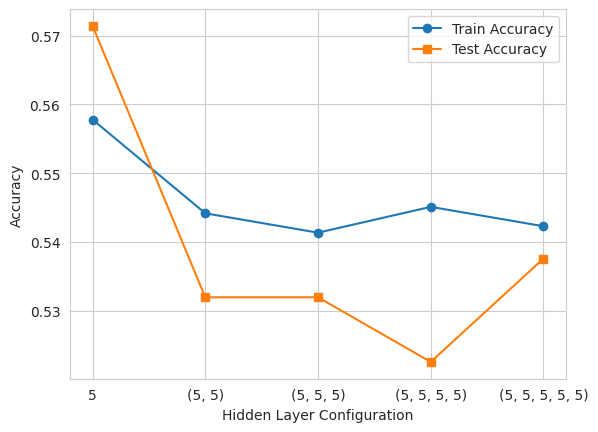

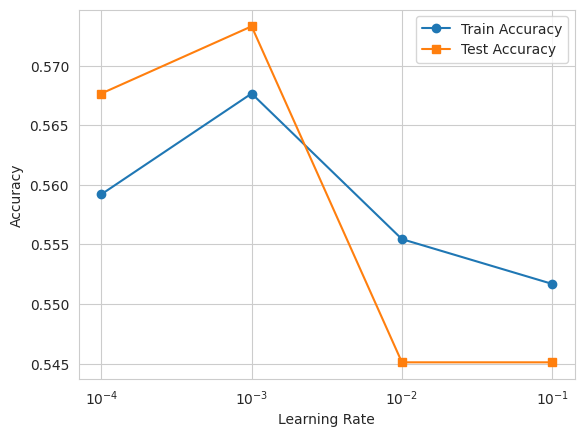

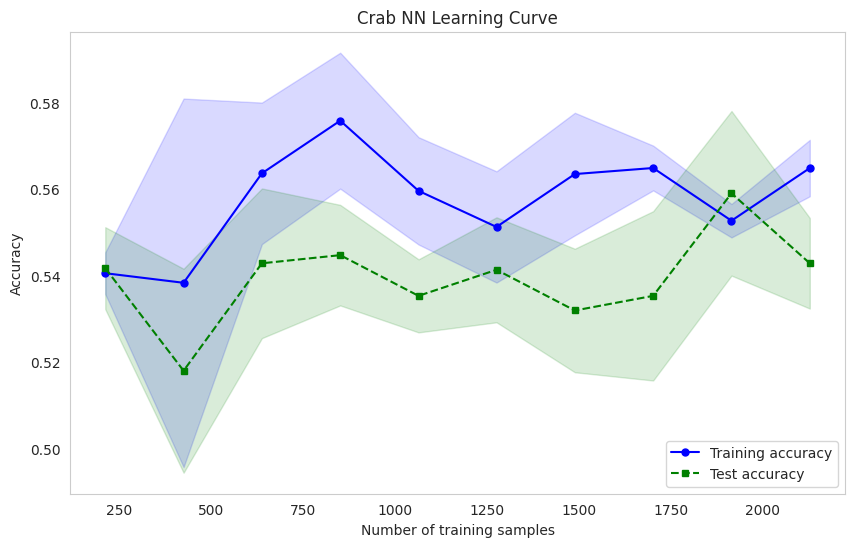

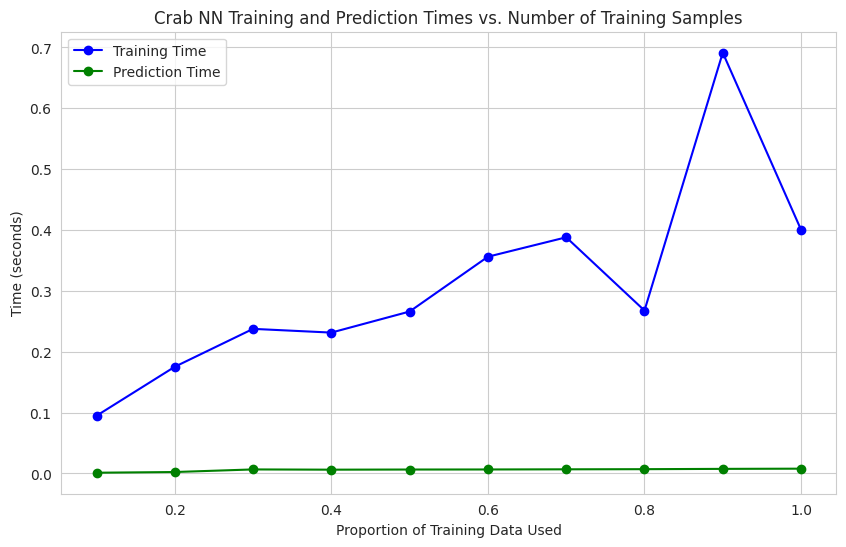

In [126]:
# Crab data
X_train, X_test, y_train, y_test = train_test_split(Xcrab, ycrab, test_size=0.2, random_state=42)

#mlp_grid_search(X_train, y_train)
plot_layers_vs_accuracy(X_train, y_train, X_test, y_test)
plot_learning_rate_vs_accuracy(X_train, y_train, X_test, y_test)
classifier = MLPClassifier(hidden_layer_sizes=(30, 30, 30), activation='relu', learning_rate_init=0.01, max_iter=2000)
plot_learning_curve(classifier, Xcrab, ycrab, cv=5, n_jobs=-1,
                        train_sizes=np.linspace(0.1, 1.0, 10),
                        scoring='accuracy', title = 'Crab NN Learning Curve')
plot_times_curve(classifier, Xcrab, ycrab, train_sizes=np.linspace(0.1, 1.0, 10), title="Crab NN Training and Prediction Times vs. Number of Training Samples")

# SVMs

In [130]:
from sklearn.svm import SVC

def plot_svm_performance(X_train, y_train, X_test, y_test, kernels=['linear', 'rbf', 'poly'], title="SVM kernel performance"):
    """
    Train an SVM for different kernels and plot the test performance.

    Parameters:
    - X_train, y_train: Training data and labels
    - X_test, y_test: Test data and labels
    - kernels: List of kernels to be tested
    """

    test_scores = []

    for kernel in kernels:
        # Train SVM
        svm = SVC(kernel=kernel)
        svm.fit(X_train, y_train)

        # Predict on test data
        test_preds = svm.predict(X_test)
        test_score = accuracy_score(y_test, test_preds)
        test_scores.append(test_score)

    # Plotting
    plt.bar(kernels, test_scores, color=['blue', 'green', 'red'])
    plt.xlabel('Kernel Type')
    plt.ylabel('Test Accuracy')
    plt.title(title)
    plt.ylim(0, 1.1)  # Setting y-axis limit for better visualization
    plt.show()

# Example usage:
# plot_svm_performance(X_train, y_train, X_test, y_test)

def best_svm_kernel(X_train, y_train):
    """
    Conduct a grid search to find the best kernel for the SVM.

    Parameters:
    - X_train, y_train: Training data and labels

    Returns:
    - The best kernel found through grid search
    """

    # SVM with parameters for grid search
    param_grid = {
        'kernel': ['linear', 'rbf', 'poly']
    }
    svm = SVC()

    # Grid search
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    print("Best kernel found: ", grid_search.best_params_['kernel'])
    return grid_search.best_params_['kernel']

# Example usage:
# best_kernel = best_svm_kernel(X_train, y_train)


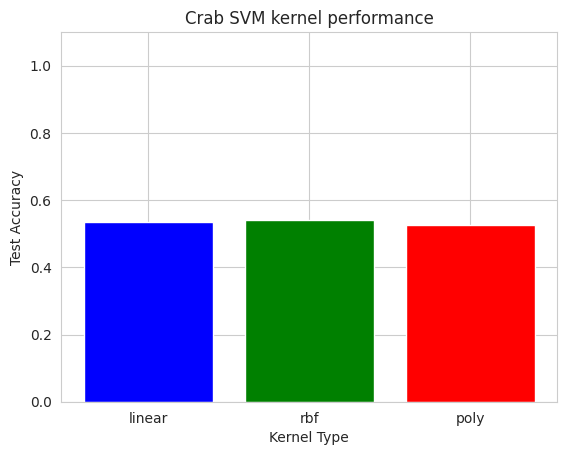

Best kernel found:  rbf


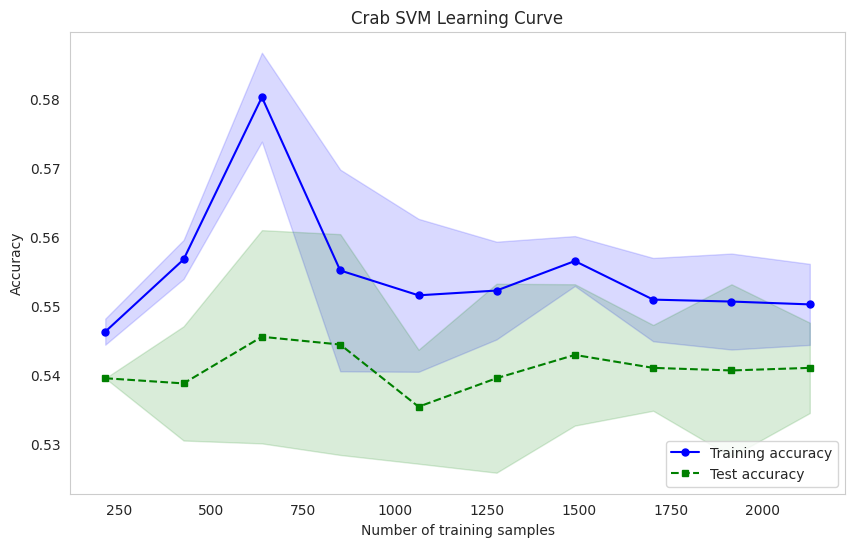

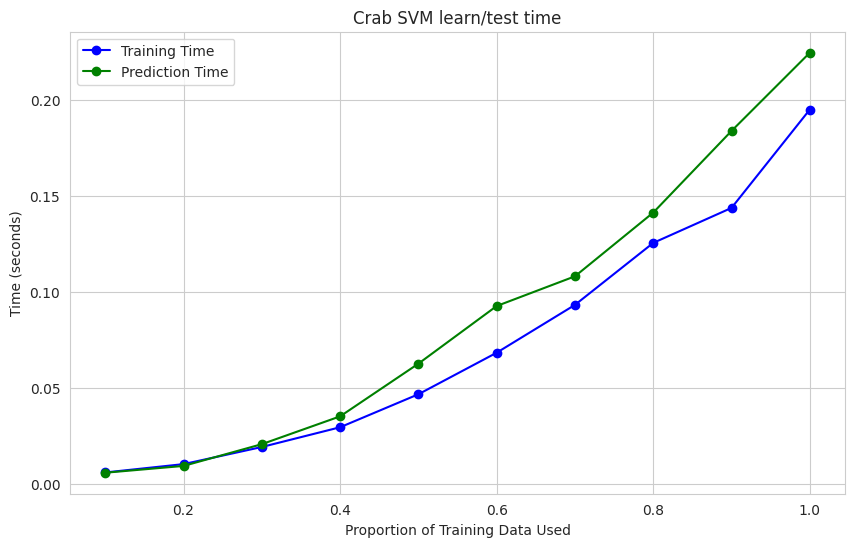

In [134]:
plot_svm_performance(X_train, y_train, X_test, y_test, kernels=['linear', 'rbf', 'poly'], title="Crab SVM kernel performance")
best_svm_kernel(X_train, y_train)
classifier=SVC(kernel="rbf")
plot_learning_curve(classifier, Xcrab, ycrab, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', title = 'Crab SVM Learning Curve')
plot_times_curve(classifier, Xcrab, ycrab, title="Crab SVM learn/test time")

## Decision Tree Classifier on crab data

The task is to classify the sex of the crab based on it's physical attributes (sex based on every other column). We might think to remove age as a column, but age can be a helpful indicator in some species. Take the bee for example. Male bee lifespans pale in comparison to the queen bee.

We make use of an cart classifier whilst limiting tree depth to classify the sex of crabs.

In [61]:
# Define the tree function for crab data

from sklearn.tree import DecisionTreeClassifier


def decisionTree(X_train, y_train, X_test, y_test, max_depth, title="f1 score vs max depth"):
    f1_test = []
    f1_train = []

    for i in list(range(1,max_depth)):
        classifier = DecisionTreeClassifier(max_depth = i, random_state=42, min_samples_leaf=1, criterion="entropy")
        classifier.fit(X_train, y_train)
        train_prediction = classifier.predict(X_train)
        test_prediction = classifier.predict(X_test)
        f1_test.append(f1_score(y_test, test_prediction, pos_label='M'))
        f1_train.append(f1_score(y_train, train_prediction, pos_label='M'))

    #Plot f1 score based on max tree depth
    plt.plot(list(range(1, max_depth)), f1_test, 'o-', color='g', label='Test F1 Score')
    plt.plot(list(range(1, max_depth)), f1_train, 'o-', color = 'r', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Max Tree Depth')

    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

    return max(f1_train), max(f1_test)


def DTGridSearchCV(start_leaf_n, end_leaf_n, X_train, y_train, title="DT grid search"):
  '''
  Performs a grid search on max depth and min samples leaf. Also does 5 fold cross validation.
  '''
  param_grid = {'min_samples_leaf':np.linspace(start_leaf_n,end_leaf_n,20).round().astype('int'), 'max_depth':np.arange(1,20)}

  tree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=param_grid, cv=5)
  tree.fit(X_train, y_train)
  print(f"Per Hyperparameter tuning, best {title} parameters are:")
  print(tree.best_params_)
  return tree.best_params_['max_depth'], tree.best_params_['min_samples_leaf']


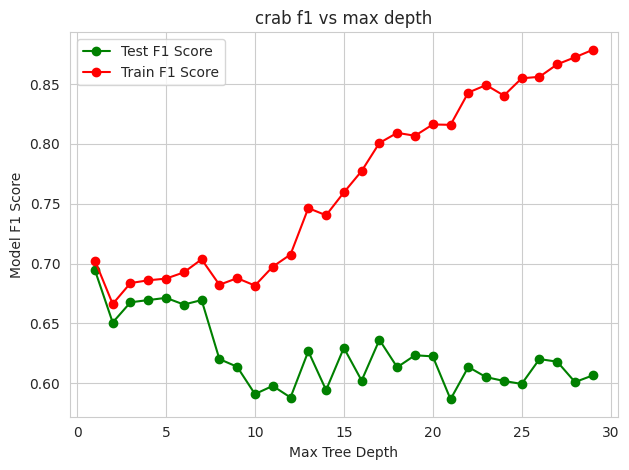

Per Hyperparameter tuning, best crab DT grid search parameters are:
{'max_depth': 4, 'min_samples_leaf': 56}


(4, 56)

In [62]:
decisionTree(X_train, y_train, X_test, y_test, 30, title="crab f1 vs max depth")
DTGridSearchCV(0.005*len(X_train), 0.05*len(X_train), X_train, y_train, title = "crab DT grid search")

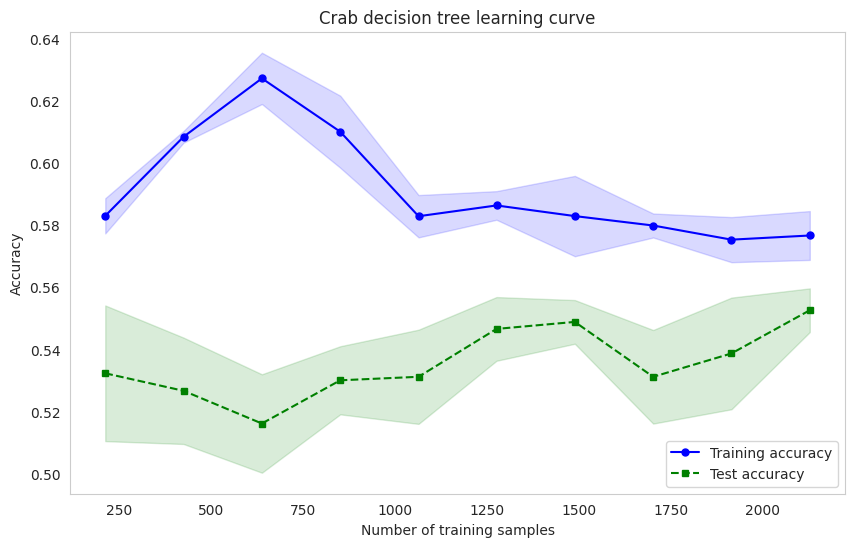

In [63]:
plot_learning_curve(DecisionTreeClassifier(max_depth = 4, random_state=42, min_samples_leaf=56, criterion="entropy"),  # Your classifier, already instantiated
    Xcrab,  # Feature matrix
    ycrab,  # Target vector
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all CPU cores
    train_sizes=np.linspace(0.1, 1.0, 10),  # Use 10 evenly spaced relative intervals for training size
    scoring='accuracy'
    , title='Crab decision tree learning curve'  # Evaluation metric. Change as needed.
                    )



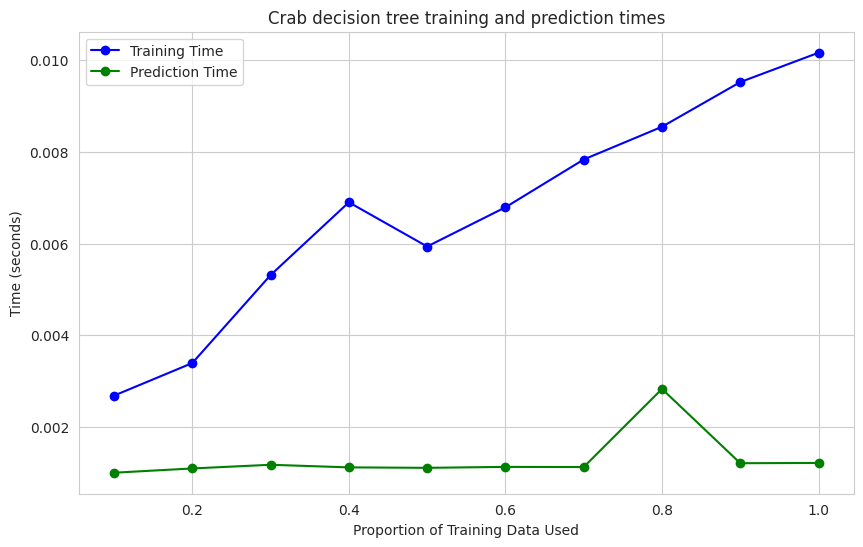

In [64]:
plot_times_curve(DecisionTreeClassifier(max_depth = 4, random_state=42, min_samples_leaf=56, criterion="entropy"), Xcrab, ycrab, title="Crab decision tree training and prediction times")

# Boosting on crab data
In this section, we implement AdaBoost which works by fitting weak learners, one after the other. The base algorithm uses decision trees as the base estimator, so it's really a series of decision tree classifiers on boosted data.  

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

def crabAdaBoost(X_train, y_train, X_test, y_test, n_estimators=50, base_depth=1, learning_rate=1.0):
    """
    Train an AdaBoost model on the crab data and plot the F1 score.

    Parameters:
    - X_train, y_train: Training data and labels
    - X_test, y_test: Test data and labels
    - n_estimators: The maximum number of estimators (trees) at which boosting is terminated.
    - base_depth: Depth of the base estimator.
    - learning_rate: Weight applied to each classifier at each boosting iteration.

    Returns:
    - F1 score of the AdaBoost model on training and test data
    """
    # Base estimator
    base_estimator = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf= 56, criterion="entropy")

    # AdaBoost classifier
    clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions
    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)

    # Compute F1 scores
    f1_train = f1_score(y_train, train_preds, pos_label='M')
    f1_test = f1_score(y_test, test_preds, pos_label='M')

    # # Plot F1 scores
    # plt.bar(['Train F1', 'Test F1'], [f1_train, f1_test])
    # plt.ylabel('F1 Score')
    # plt.title('F1 Score with AdaBoost')
    # plt.show()

    return f1_train, f1_test

# Example usage
# f1_train, f1_test = crabAdaBoost(X_train, y_train, X_test, y_test)

def adaBoostGridSearch(X_train, y_train):
  param_grid = {
      'n_estimators': [10, 50, 100, 200],
      'learning_rate': [0.01, 0.1, 0.5, 1],
      'estimator__max_depth': [1, 2, 3, 4, 5],
  }

  base = DecisionTreeClassifier()
  ada = AdaBoostClassifier(estimator=base)

  grid_search = RandomizedSearchCV(ada, param_distributions=param_grid, cv=5, random_state=42)
  grid_search.fit(X_train, y_train)
  print("Per Hyperparameter tuning, best parameters are:")
  print(grid_search.best_params_)
  return grid_search.best_params_['n_estimators'], grid_search.best_params_['learning_rate'], grid_search.best_params_['estimator__max_depth']





In [66]:
adaBoostGridSearch(X_train, y_train)

Per Hyperparameter tuning, best parameters are:
{'n_estimators': 100, 'learning_rate': 0.01, 'estimator__max_depth': 2}


(100, 0.01, 2)

In [67]:
def plotF1VsNEstimators(X_train, y_train, X_test, y_test, base_depth=2, learning_rate=0.01, max_estimators=200, title='AdaBoost F1 Scores vs. Number of Estimators'):
    """"
    Plot the F1 scores for training and test data as a function of the number of n_estimators.

    Parameters:
    - X_train, y_train: Training data and labels
    - X_test, y_test: Test data and labels
    - base_depth: Depth of the base estimator
    - learning_rate: Weight applied to each classifier at each boosting iteration
    - max_estimators: The maximum number of estimators to test

    Returns:
    - A plot of F1 scores vs. number of n_estimators
    """
    train_scores = []
    test_scores = []
    estimator_range = list(range(1, max_estimators + 1))

    for n_estimators in estimator_range:
        f1_train, f1_test = crabAdaBoost(X_train, y_train, X_test, y_test, n_estimators=n_estimators, base_depth=base_depth, learning_rate=learning_rate)
        train_scores.append(f1_train)
        test_scores.append(f1_test)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(estimator_range, train_scores, label="Train F1 Score", marker='o')
    plt.plot(estimator_range, test_scores, label="Test F1 Score", marker='o')
    plt.title('Crab AdaBoost F1 Scores vs. Number of Estimators')
    plt.xlabel('Number of n_estimators')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# plotF1VsNEstimators(X_train, y_train, X_test, y_test)


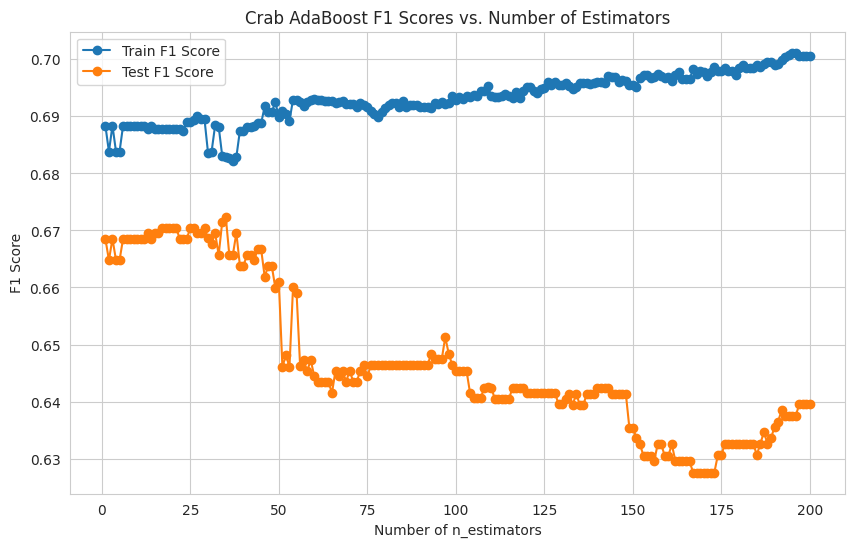

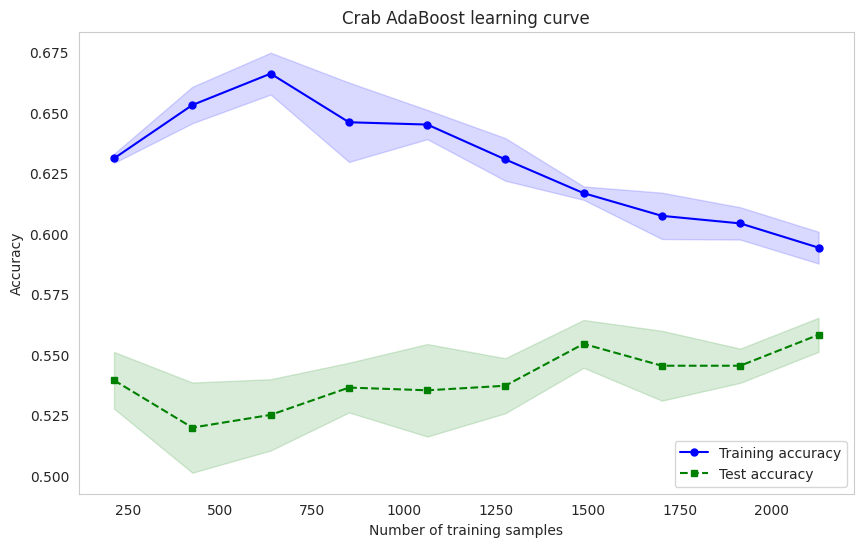

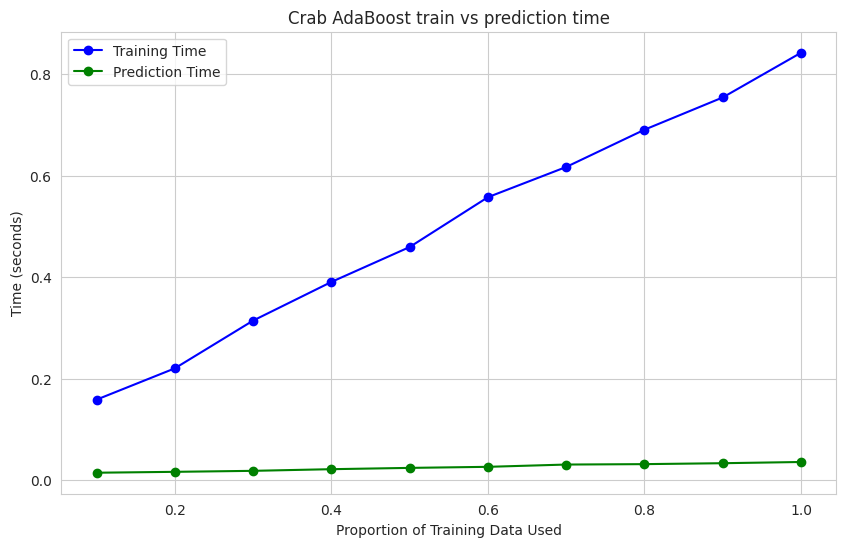

In [68]:
plotF1VsNEstimators(X_train, y_train, X_test, y_test)
base_estimator = DecisionTreeClassifier(max_depth=4, random_state=42, min_samples_leaf= 56, criterion="entropy")

clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=0.01, random_state=42)

plot_learning_curve(clf, Xcrab, ycrab, cv=5, n_jobs=-1,
                        train_sizes=np.linspace(0.1, 1.0, 10),
                        scoring='accuracy', title="Crab AdaBoost learning curve")

plot_times_curve(clf, Xcrab, ycrab, train_sizes=np.linspace(0.1, 1.0, 10), title="Crab AdaBoost train vs prediction time")